*Test the Model*

In [1]:
#Step 1.1- #Loading the saved_model
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="pre-trained-models/my_model_640x640/saved_model"
#PATH_TO_SAVED_MODEL="/content/gdrive/My Drive/TensorFlow/workspace/training_demo/exported-models/Sketch2Code_model_v2/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


In [2]:
#Step 1.2- #Setting Threshold Vaalue
THRESHOLD_VALUE = 0.4
print('Threshold value: '+ str(THRESHOLD_VALUE))
KEY_BOXES = 'detection_boxes'
KEY_CLASSES= 'detection_classes'
KEY_SCORES = 'detection_scores'
KEY_CLASS_NAMES='detection_class_names'
KEY_BOX_AREAS='detection_box_areas'

Threshold value: 0.4


In [3]:
#Step 2- #Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("annotations/label_map.pbtxt",use_display_name=True)
print(type(category_index))
print(category_index)

#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

<class 'dict'>
{1: {'id': 1, 'name': 'TextView'}, 2: {'id': 2, 'name': 'EditText'}, 3: {'id': 3, 'name': 'Button'}, 4: {'id': 4, 'name': 'Image'}, 5: {'id': 5, 'name': 'Fab'}, 6: {'id': 6, 'name': 'Icon'}, 7: {'id': 7, 'name': 'AppBar'}, 8: {'id': 8, 'name': 'ActionButton'}, 9: {'id': 9, 'name': 'CheckBox'}, 10: {'id': 10, 'name': 'RadioButton'}, 11: {'id': 11, 'name': 'RadioGroup'}, 12: {'id': 12, 'name': 'Switch'}, 13: {'id': 13, 'name': 'CardView'}, 14: {'id': 14, 'name': 'ListView'}, 15: {'id': 15, 'name': 'ScrollView'}, 16: {'id': 16, 'name': 'IconButton'}, 17: {'id': 17, 'name': 'ImageButton'}, 18: {'id': 18, 'name': 'RoundedImage'}, 19: {'id': 19, 'name': 'BottomNavBar'}, 20: {'id': 20, 'name': 'BackButton'}, 21: {'id': 21, 'name': 'CloseButton'}, 22: {'id': 22, 'name': 'Tab'}, 23: {'id': 23, 'name': 'RatingBar'}, 24: {'id': 24, 'name': 'Layout'}, 25: {'id': 25, 'name': 'BottomNavItems'}, 26: {'id': 26, 'name': 'MainLayout'}, 27: {'id': 27, 'name': 'HorizontalListView'}, 28: {'i

In [4]:
#Step 4.1- Getting Detections Dict from Vision Model

import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))



# infer single image and return detection dictionary

def infer_single_img(image_np):
    print('Running inference for img ....')
    
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor=input_tensor[tf.newaxis, ...]
    
    # Get Detections for Tensor
    detections=detect_fn(input_tensor)
    
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections
    
    # detection_classes should be ints.
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)
    
    print('Done!')
    return detections
    
    


def show_virtualization(detections,image_np_with_detections):
    # Virtulaize in matlab
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections[KEY_BOXES],
          detections[KEY_CLASSES],
          detections[KEY_SCORES],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=50,     #max number of bounding boxes in the image
          min_score_thresh= THRESHOLD_VALUE, #min prediction threshold
          agnostic_mode=False)
    %matplotlib inline
    mpl.rcParams['figure.dpi']= 250
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()
    

    #Infer single image from Image numpy array and Virtualize
def infer_and_show_virtualization(image_np):
    # get Image detections dict
    detections = infer_single_img(image_np)
    
     # Copy Image numpy array
    image_np_with_detections=image_np.copy()
    
    #Virtualize the detections
    show_virtualization(detections,image_np_with_detections)
    

    

    

In [ ]:
#Step 3.1- #Loading the Multiple image
#img=['/content/gdrive/My Drive/TensorFlow/test2.jpg','/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/img82.jpg','/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/img83.jpg']
img = []
basePath = 'images/test/'
start=80

for i in range(1):
  imagePath = basePath+"img"+str(start+i)+".jpg"
  img.append(imagePath)

print(img)

#list containing paths of all the images

In [5]:
#Step 3.2- #Loading the single image
imagePath = 'images/test/img81.jpg'
print(imagePath)
# Load image as np array
image_np = load_image_into_numpy_array(imagePath)


images/test/img81.jpg


Running inference for img ....
Done!
Done


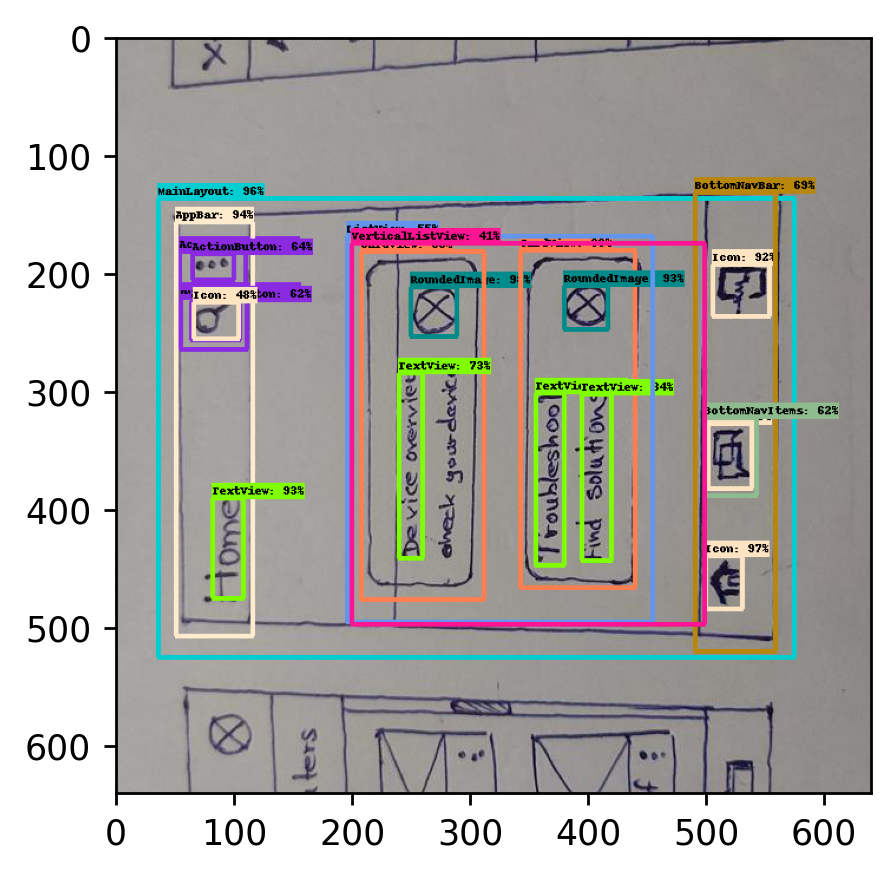

In [111]:
#Step 4.1- #Infer and Show Vitulized Detections
# Infer image
infer_and_show_virtualization(image_np)

In [6]:
# Assign Global detection for testing 
detections = infer_single_img(image_np)

Running inference for img ....
Done!


In [7]:
from scipy import ndimage

def filter_with_treshold(detections):
    # getting filter array according to the Treshold
    threshold_filter = detections[KEY_SCORES] >= THRESHOLD_VALUE
    
    # Filterinf SCORES,CLASSES,BOXES according to the filter
    filtered_detections = dict()
    filtered_detections[KEY_SCORES] = detections[KEY_SCORES][threshold_filter]
    filtered_detections[KEY_CLASSES] = detections[KEY_CLASSES][threshold_filter]
    filtered_detections[KEY_BOXES] = detections[KEY_BOXES][threshold_filter]
    
    return filtered_detections

def get_name_for_class(class_list):
    name_list = list()
    for class_no in class_list:
        name_list.append(category_index[class_no]['name'])
        
    return name_list

def get_name_for_class(class_no):
    return category_index[class_no]['name']
    

def crop_image(box,image_path):
    # Change bounding box to 640 and integer
    box_to_int = box *640
    box_to_int = box_to_int.astype(np.int64)

    # Asign box values to each corresponding variables
    ymin, xmin, ymax, xmax = box_to_int
    image = plt.imread(image_path)
    
    #Image cropped here
    croped_image = image[ymin:ymax, xmin:xmax, :]
    # Cropped Image is rotated clockwise 90 degree
    rotated_img = ndimage.rotate(croped_image,-90)
    
    fig = plt.figure()
    subPlot = fig.add_subplot(3,3,3)
    #subPlot.imshow(croped_image)
    subPlot.imshow(rotated_img, cmap=plt.cm.gray)
    plt.axis('off')
    
    
    
def try_crop_image(detections):
    filtered_detections= filter_with_treshold(detections)
    # Crop and plot Every detected classes
    for box in filtered_detections[KEY_BOXES]:
        crop_image(box,imagePath)
    
    
    

In [13]:
from scipy import ndimage
import matplotlib.patches as patches
        

def rotate_image(image,degree):
    return ndimage.rotate(image,degree)

def rotate_box_rightangle_clockwise(box):
    ymin, xmin, ymax, xmax = box
    
    #Rotate box
    yrmin= xmin
    xrmin= 640-ymax
    yrmax= xmax
    xrmax= 640-ymin
    
    return [yrmin, xrmin, yrmax, xrmax]
    
def change_box_to_int(box):
    return (box*640).astype(np.int64)

def change_box(box):
    return rotate_box_rightangle_clockwise(change_box_to_int(box))

def area_of_the_box(ymin, xmin, ymax, xmax):
    h = ymax - ymin
    w= xmax - xmin
    return h*w

def area_of_the_box(box):
    ymin, xmin, ymax, xmax = box
    h = ymax - ymin
    w= xmax - xmin
    return h*w

# percentage of overlaping area
def overlap_area_percentage(box_area,overlap_area):
    return overlap_area/box_area

# percentage of overlaping area
def overlap_area_percentage(box,overlap_box):
    box_area = area_of_the_box(box)
    overlap_area = area_of_the_box(overlap_box)
    return overlap_area/box_area
    



def test():
    # Load Image
    image = plt.imread(imagePath)
    # Rotate Image
    image = rotate_image(image,-90)
    
    # Get filtered detections with threshold
    filtered_detections = filter_with_treshold(detections)
    # Create figure and axes
    fig,ax = plt.subplots(1)
    
    # Draw Rectangles for boxes
    for box in filtered_detections[KEY_BOXES]:
        ymin, xmin, ymax, xmax = change_box(box)
        # Create a Rectangle patch
        rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    # Display the image
    ax.imshow(image)
    plt.show()
    

test()


In [8]:
OVERLAP_AREA_THRESHOLD = 0.6
# 1) Full Overlap
# check box is inside stable box return TRUE/FALSE
# Scenario-5
def check_if_box_inside(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    if xmin< xomin < xomax < xmax  and ymin<yomin<yomax<ymax :
        return True
    else:
        return False
    
# check stable box is inside overlap box return TRUE/FALSE
# Scenario-14
def check_if_box_cover(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
   
    if  xomin< xmin < xmax< xomax   and yomin<ymin<ymax<yomax :
        return True
    else:
        return False

# 2) Cross Overlap
# check if boxes are cross overlaped
# returns tuple (TRUE/FALSE,intersection points[ymin, xmin, ymax, xmax])
def check_cross_overlap(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    
    if  xmin<xomin<xomax<xmax  and yomin<ymin<ymax<yomax :  ## Scenario-15: stable box width big, height small
        return (True,np.array([ymin, xomin, ymax, xomax]))
    elif xomin<xmin<xmax<xomax  and ymin<yomin<yomax<ymax : ## Scenario-16: stable box width small, height big
        return (True,np.array([yomin, xmin, yomax, xmax]))
    else:
        return (False,)
    
# 3) Partial Overlap
# 3.1) Partial overlap in corners
# Scenario-01 : check overlap in Top Left corner
# returns tuple (TRUE/FALSE,intersection points np.array([ymin, xmin, ymax, xmax]))
def check_topleft_corner_overlap(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    
    if  xomin<xmin<xomax<xmax  and yomin<ymin<yomax<ymax :
        return (True,np.array([ymin, xmin, yomax, xomax]))
    else:
        return (False,)
    
# Scenario-02 : check overlap in Bottom Left corner
# returns tuple (TRUE/FALSE,intersection points ->np.array([ymin, xmin, ymax, xmax]))
def check_bottomleft_corner_overlap(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    
    if  xomin<xmin<xomax<xmax  and ymin<yomin<ymax<yomax :
        return (True,np.array([yomin, xmin, ymax, xomax]))
    else:
        return (False,)

# Scenario-03 : check overlap in Bottom Right corner
# returns tuple (TRUE/FALSE,intersection points ->np.array([ymin, xmin, ymax, xmax]))
def check_bottomright_corner_overlap(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    
    if  xmin<xomin<xmax<xomax  and ymin<yomin<ymax<yomax :
        return (True,np.array([yomin, xomin, ymax, xmax]))
    else:
        return (False,)
    
# Scenario-04 : check overlap in Top Right corner
# returns tuple (TRUE/FALSE,intersection points ->np.array([ymin, xmin, ymax, xmax]))
def check_topright_corner_overlap(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    
    if  xmin<xomin<xmax<xomax  and yomin<ymin<yomax<ymax :
        return (True,np.array([ymin, xomin, yomax, xmax]))
    else:
        return (False,)


# Check All Overlaps
# returns tuple (TRUE/FALSE,Overlap type,intersection points ->np.array([ymin, xmin, ymax, xmax]))
def check_for_partial_overlap(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box

   
    if xomin<xmin<xomax<xmax  and yomin<ymin<yomax<ymax :  # Scenario-01 : check overlap in Top Left corner
        return (True,np.array([ymin, xmin, yomax, xomax]))
    elif xomin<xmin<xomax<xmax  and ymin<yomin<ymax<yomax :# Scenario-02 : check overlap in Bottom Left corner
        return (True,np.array([yomin, xmin, ymax, xomax]))
    elif xmin<xomin<xmax<xomax  and ymin<yomin<ymax<yomax : # Scenario-03 : check overlap in Bottom Right corner
        return (True,np.array([yomin, xomin, ymax, xmax]))
    elif xmin<xomin<xmax<xomax  and yomin<ymin<yomax<ymax :# Scenario-04 : check overlap in Top Right corner
        return (True,np.array([ymin, xomin, yomax, xmax]))
    elif xomin<xmin<xomax<xmax  and yomin<ymin<ymax<yomax :# Scenario-06 : check overlap in Left side Big Box
        return (True,np.array([ymin, xmin, ymax, xomax]))
    elif xomin<xmin<xomax<xmax  and ymin<yomin<yomax<ymax :# Scenario-07 : check overlap in Left side Small Box
        return (True,np.array([yomin, xmin, yomax, xomax]))
    elif xmin<xomin<xomax<xmax  and ymin<yomin<ymax<yomax :# Scenario-08 : check overlap in Bottom side Small Box
        return (True,np.array([yomin, xomin, ymax, xomax]))
    elif xmin<xomin<xomax<xmax  and yomin<ymin<yomax<ymax :# Scenario-09 : check overlap in Bottom side Big Box
        return (True,np.array([ymin, xomin, yomax, xomax]))
    elif xmin<xomin<xmax<xomax  and ymin<yomin<yomax<ymax :# Scenario-10 : check overlap in Right side Small Box
        return (True,np.array([yomin, xomin, yomax, xmax]))
    elif xmin<xomin<xmax<xomax  and yomin<ymin<ymax<yomax :# Scenario-11 : check overlap in Right side Big Box
        return (True,np.array([ymin, xomin, ymax, xmax]))
    elif xomin<xmin<xmax<xomax  and yomin<ymin<yomax<ymax :# Scenario-12 : check overlap in Top side Big Box
        return (True,np.array([ymin, xmin, yomax, xmax]))
    elif xmin<xomin<xomax<xmax  and yomin<ymin<yomax<ymax :# Scenario-13 : check overlap in Top side Small Box
        return (True,np.array([ymin, xomin, yomax, xomax]))
    elif xmin<xomin<xomax<xmax  and yomin<ymin<ymax<yomax :  ## Scenario-15: stable box width big, height small
        return (True,np.array([ymin, xomin, ymax, xomax]))
    elif xomin<xmin<xmax<xomax  and ymin<yomin<yomax<ymax : ## Scenario-16: stable box width small, height big
        return (True,np.array([yomin, xmin, yomax, xmax]))
    else:
        return (False,)
    
# Find box overlap
def is_inside_by_partial_overlap(stable_box,overlap_box):
    overlap_tuple = check_for_partial_overlap(stable_box,overlap_box) # returns tuple (TRUE/FALSE,intersection points[ymin, xmin, ymax, xmax])
    
    if overlap_tuple[0]:
        percentage = overlap_area_percentage(overlap_box,overlap_tuple[1])
        if percentage > OVERLAP_AREA_THRESHOLD:
            return True
        else:
            return False
    else:
        return False
    
def is_inside_by_full_overlap(stable_box,overlap_box):
    return check_if_box_inside(stable_box,overlap_box)

def trim_inside_stable_box(stable_box,overlap_box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = overlap_box
    
    if not(xmin<=xomin):
        xomin = xmin
    
    if not(xomax<=xmax):
        xomax = xmax
    
    if not(ymin<=yomin):
        yomin = ymin
    
    if not(yomax<=ymax):
        yomax= ymax
    
    # Changed here from np array to list
    return [yomin, xomin, yomax, xomax]
    



In [9]:
def prepare_widget_dict(widget_id,class_no,box,score):
    widget_dict = dict()
    widget_dict['id']=widget_id
    widget_dict['class']=class_no
    widget_dict['box']=box
    widget_dict['score']=score
    return widget_dict

# Grouping
def group_components_appbar_bottomnav(detections,ui_dict):
    detections_copy = detections.copy()
    root_box = ui_dict[ROOT_ID]['box']
    appbar_box = ui_dict[APPBAR_ID]['box']
    bottomnav_box = ui_dict[BOTTOMNAV_ID]['box']
    for index,class_no in enumerate(detections_copy[KEY_CLASSES]):
        # Check for Widget counts saved
        if class_no in ui_dict[KEY_CLASSES_COUNT]:
            ui_dict[KEY_CLASSES_COUNT][class_no] = ui_dict[KEY_CLASSES_COUNT][class_no] + 1
        else:
            ui_dict[KEY_CLASSES_COUNT][class_no] = 1
        # get box of component
        box = change_box(detections_copy[KEY_BOXES][index])
        score = detections_copy[KEY_SCORES][index]
        widget_id = category_index[class_no]['name']+str(ui_dict[KEY_CLASSES_COUNT][class_no])
        
        # Check box is inside root
        if is_inside_by_full_overlap(root_box,box) or is_inside_by_partial_overlap(root_box,box):
            root_trimed_box = trim_inside_stable_box(root_box,box)
            # Check box inside app bar
            if is_inside_by_full_overlap(appbar_box,root_trimed_box) or is_inside_by_partial_overlap(appbar_box,root_trimed_box):
                trimed_box = trim_inside_stable_box(appbar_box,root_trimed_box)
                ui_dict[APPBAR_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,trimed_box,score)
            
            # Check box inside BottomNav bar
            elif is_inside_by_full_overlap(bottomnav_box,root_trimed_box) or is_inside_by_partial_overlap(bottomnav_box,root_trimed_box): 
                trimed_box = trim_inside_stable_box(bottomnav_box,root_trimed_box)
                ui_dict[BOTTOMNAV_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,trimed_box,score)
            # add box inside content
            else:
                ui_dict[ROOT_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,root_trimed_box,score)
        else:
            print('component outside root')


def group_components_only_bottomnav(detections,ui_dict):
    detections_copy = detections.copy()
    root_box = ui_dict[ROOT_ID]['box']
    bottomnav_box = ui_dict[BOTTOMNAV_ID]['box']
    for index,class_no in enumerate(detections_copy[KEY_CLASSES]):
        # Check for Widget counts saved
        if class_no in ui_dict[KEY_CLASSES_COUNT]:
            ui_dict[KEY_CLASSES_COUNT][class_no] = ui_dict[KEY_CLASSES_COUNT][class_no] + 1
        else:
            ui_dict[KEY_CLASSES_COUNT][class_no] = 1
        # get box of component
        box = change_box(detections_copy[KEY_BOXES][index])
        score = detections_copy[KEY_SCORES][index]
        widget_id = category_index[class_no]['name']+str(ui_dict[KEY_CLASSES_COUNT][class_no])
        
        # Check box is inside root
        if is_inside_by_full_overlap(root_box,box) or is_inside_by_partial_overlap(root_box,box):
            root_trimed_box = trim_inside_stable_box(root_box,box)

            # Check box inside BottomNav bar
            if is_inside_by_full_overlap(bottomnav_box,root_trimed_box) or is_inside_by_partial_overlap(bottomnav_box,root_trimed_box): 
                trimed_box = trim_inside_stable_box(bottomnav_box,root_trimed_box)
                ui_dict[BOTTOMNAV_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,trimed_box,score)
            # add box inside content
            else:
                ui_dict[ROOT_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,root_trimed_box,score)
        else:
            print('component outside root')
            
            
def group_components_only_appbar(detections,ui_dict):
    detections_copy = detections.copy()
    root_box = ui_dict[ROOT_ID]['box']
    appbar_box = ui_dict[APPBAR_ID]['box']
    for index,class_no in enumerate(detections_copy[KEY_CLASSES]):
        # Check for Widget counts saved
        if class_no in ui_dict[KEY_CLASSES_COUNT]:
            ui_dict[KEY_CLASSES_COUNT][class_no] = ui_dict[KEY_CLASSES_COUNT][class_no] + 1
        else:
            ui_dict[KEY_CLASSES_COUNT][class_no] = 1
        # get box of component
        box = change_box(detections_copy[KEY_BOXES][index])
        score = detections_copy[KEY_SCORES][index]
        widget_id = category_index[class_no]['name']+str(ui_dict[KEY_CLASSES_COUNT][class_no])
        
        # Check box is inside root
        if is_inside_by_full_overlap(root_box,box) or is_inside_by_partial_overlap(root_box,box):
            root_trimed_box = trim_inside_stable_box(root_box,box)
            # Check box inside app bar
            if is_inside_by_full_overlap(appbar_box,root_trimed_box) or is_inside_by_partial_overlap(appbar_box,root_trimed_box):
                trimed_box = trim_inside_stable_box(appbar_box,root_trimed_box)
                ui_dict[APPBAR_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,trimed_box,score)
            # add box inside content
            else:
                ui_dict[ROOT_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,root_trimed_box,score)
        else:
            print('component outside root')
            

def group_components_only_root(detections,ui_dict):
    detections_copy = detections.copy()
    root_box = ui_dict[ROOT_ID]['box']
    for index,class_no in enumerate(detections_copy[KEY_CLASSES]):
        # Check for Widget counts saved
        if class_no in ui_dict[KEY_CLASSES_COUNT]:
            ui_dict[KEY_CLASSES_COUNT][class_no] = ui_dict[KEY_CLASSES_COUNT][class_no] + 1
        else:
            ui_dict[KEY_CLASSES_COUNT][class_no] = 1
        # get box of component
        box = change_box(detections_copy[KEY_BOXES][index])
        score = detections_copy[KEY_SCORES][index]
        widget_id = category_index[class_no]['name']+str(ui_dict[KEY_CLASSES_COUNT][class_no])
        
        # Check box is inside root
        if is_inside_by_full_overlap(root_box,box) or is_inside_by_partial_overlap(root_box,box):
            trimed_box = trim_inside_stable_box(root_box,box)
            ui_dict[ROOT_ID]['content'][widget_id] = prepare_widget_dict(widget_id,class_no,trimed_box,score)
        else:
            print('component outside root')
            

# Loop through detections other than MainLayout(root), AppBar, BottomNavBar
def group_gui_components_into_root_appbar_bottomnav(detections,ui_dict):
    if ROOT_ID in ui_dict:
        # check if Appbar and BottomNav available
        if APPBAR_ID in ui_dict and BOTTOMNAV_ID in ui_dict:
            print('AppBar and BottomNav both available')
            group_components_appbar_bottomnav(detections,ui_dict)
        # Check if only Appbar available
        elif APPBAR_ID in ui_dict:
            print('Only AppBar available')
            group_components_only_appbar(detections,ui_dict)
        # Check if only bottom nav available
        elif BOTTOMNAV_ID in ui_dict:
            print('Only BottomNav available')
            group_components_only_bottomnav(detections,ui_dict)
        # Else only root available
        else:
            print('Only root available')
            group_components_only_root(detections,ui_dict)      
    else:
        print('No root key in ui_dict')
        

        
def group_contents(content_dict):
    pass


    
    

In [10]:


def layout_grouping(content_dict):
    content_copy = content_dict.copy()
    layouts = list()
    cardviews = list()
    other_widgets = list()
    
    
    # Extract Layouts from content
    for widget_id in content_copy:
        if content_copy[widget_id]['class']== 24:
            layouts.append(widget_id)
        elif content_copy[widget_id]['class']== 13:
            cardviews.append(widget_id)
        else:
            other_widgets.append(widget_id)
    
    if len(layouts)<1 and len(cardviews)<1:
        return
    
    # resolve layout and cardview
    for layout_id in layouts:
        if len(cardviews)<1:
            break
        layout_box = content_copy[layout_id]['box']
        ids_to_remove = list() # Cardview ids to be removed
        for cardview_id in cardviews:
            cardview_box = content_copy[cardview_id]['box']
            if is_inside_by_full_overlap(layout_box,cardview_box) or is_inside_by_partial_overlap(layout_box,cardview_box) or check_if_box_cover(layout_box,cardview_box) :
                content_dict[layout_id]['alt']=['CardView']
                content_dict.pop(cardview_id)
                ids_to_remove.append(cardview_id)
        for id_to_remove in ids_to_remove:
            cardviews.remove(id_to_remove)
    
    # Merge Cardview and Layout
    layouts.extend(cardviews)
    
    
    # Group Layouts
    for layout_id in layouts:
        if len(other_widgets)<1:
            break
        content_dict[layout_id]['content'] = dict()
        layout_box = content_copy[layout_id]['box']
        ids_to_remove = list() # other widget Id's to be removed
        for widget_id in other_widgets:
            widget_box = content_copy[widget_id]['box']
            if is_inside_by_full_overlap(layout_box,widget_box) or is_inside_by_partial_overlap(layout_box,widget_box):
                content_dict[layout_id]['content'][widget_id] = content_dict[widget_id]
                content_dict.pop(widget_id)
                ids_to_remove.append(widget_id)
        for id_to_remove in ids_to_remove:
            other_widgets.remove(id_to_remove)
            

            
                
                

        
    
            
def cardview_grouping():
    pass
def tab_grouping():
    pass

def listview_grouping(content_dict):
    content_copy = content_dict.copy()
    listviews = list()
    h_list = list()
    v_list = list()
    layouts = list()
    recycler = list()
    
    # Resolve ListView, horizontal and vertical list view as Recycler view
    for widget_id in content_copy:
        if content_copy[widget_id]['class']== 14:
            listviews.append(widget_id)
        elif content_copy[widget_id]['class']== 27:
            h_list.append(widget_id)
        elif content_copy[widget_id]['class']== 28:
            v_list.append(widget_id)
        elif content_copy[widget_id]['class']== 24:
            layouts.append(widget_id)
        elif content_copy[widget_id]['class']== 13: # change made for cardview grouping
            layouts.append(widget_id)
    
    # Resolve for Horizontal listview
    for hlist_id in h_list:
        # If no listviews box break the loop
        if len(listviews) <1:
            break
        hlist_box = content_copy[hlist_id]['box']
        ids_to_remove = list() # Listview ids to be removed
        
        # Loop through listviews list()
        for listview_id in listviews:
            listview_box = content_copy[listview_id]['box']
            if is_inside_by_full_overlap(hlist_box,listview_box) or is_inside_by_partial_overlap(hlist_box,listview_box) or check_if_box_cover(hlist_box,listview_box) :
                recycler.append(hlist_id) # add horizontal list view id 
                content_dict.pop(listview_id) # remove listview from dictionary
                ids_to_remove.append(listview_id)
        for id_to_remove in ids_to_remove:
            listviews.remove(id_to_remove)
    
    # Resolve for Vertical listview
    for vlist_id in v_list:
        # If no listviews box break the loop
        if len(listviews) <1:
            break
        vlist_box = content_copy[vlist_id]['box']
        ids_to_remove = list() # Listview ids to be removed
        
        # Loop through listviews list()
        for listview_id in listviews:
            listview_box = content_copy[listview_id]['box']
            if is_inside_by_full_overlap(vlist_box,listview_box) or is_inside_by_partial_overlap(vlist_box,listview_box) or check_if_box_cover(vlist_box,listview_box) :
                recycler.append(vlist_id) # add horizontal list view id 
                content_dict.pop(listview_id) # remove listview from dictionary
                ids_to_remove.append(listview_id)
        for id_to_remove in ids_to_remove:
            listviews.remove(id_to_remove)
            
    
    # check if recycler list is not empty
    if len(recycler)<1:
        print('No List views')
    else:
        listview_name = 'ListView'
        for index,list_id in enumerate(recycler):
            list_key = listview_name+str(index+1)
            content_dict[list_key] = dict()
            content_dict[list_key]['id'] = list_key
            content_dict[list_key]['class'] =14
            content_dict[list_key]['box'] =  content_dict[list_id]['box']
            content_dict[list_key]['score'] = content_dict[list_id]['score']
            content_dict[list_key]['content']= dict()
            # Orientation Horizontal = 0 ,Vertical = 1
            if content_copy[list_id]['class']== 27:
                content_dict[list_key]['orientation'] = 0
            elif content_copy[list_id]['class']== 28:
                content_dict[list_key]['orientation'] = 1
            else:
                content_dict[list_key]['orientation'] = 1
            
            # remove listview from content dict
            content_dict.pop(list_id)
            
            listview_box= content_dict[list_key]['box']
            ids_to_remove = list() # other widget Id's to be removed
            # Group Layouts inside list dict
            for layout_id in layouts:
                layout_box = content_copy[layout_id]['box']
                if is_inside_by_full_overlap(listview_box,layout_box) or is_inside_by_partial_overlap(listview_box,layout_box):
                    content_dict[list_key]['content'][layout_id] = content_dict[layout_id]
                    content_dict[list_key]['content'][layout_id]['box']=trim_inside_stable_box(listview_box,layout_box)
                    content_dict.pop(layout_id)
                    ids_to_remove.append(layout_id)
            for id_to_remove in ids_to_remove:
                layouts.remove(id_to_remove)
                
        
                
            
        
    
    
   
    

def radio_grouping():
    pass
def appbar_grouping():
    pass


In [11]:
## positioning
# Height interaction
def get_height_interaction(stable_box,box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = box

    if yomin<=ymin<ymax<=yomax :
        return 1
    elif ymin<yomin<yomax<ymax:
        return yomax-yomin/ymax-ymin
    elif yomin<=ymin<yomax<ymax:
        return yomax-ymin/ymax-ymin
    elif ymin<yomin<ymax<=yomax:
        return ymax-yomin/ymax-ymin
    else:
        return 0

 # Width interaction
def get_width_interaction(stable_box,box):
    ymin, xmin, ymax, xmax = stable_box
    yomin, xomin, yomax, xomax = box

    if xomin<=xmin<xmax<=xomax:
        return 1
    elif xmin<xomin<xomax<xmax:
        return xomax-xomin/xmax-xmin
    elif xomin<=xmin<xomax<xmax:
        return xomax-xmin/xmax-xmin
    elif xmin<xomin<xmax<=xomax:
        return xmax-xomin/xmax-xmin
    else:
        return 0

# Check if the box onSides
# Returns Tuple of widget id's (Top ,start,bottom,end)
def check_widgets_onsides(parent,content,stable_widget):
    ymin, xmin, ymax, xmax = stable_widget['box']
    ypmin, xpmin, ypmax, xpmax = parent['box']
    
    parent_id = 'parent'
    
    widget_top = parent_id
    distance_top = ymin-ypmin
    interact_top =0
    
    widget_bottom = parent_id
    distance_bottom = ypmax-ymax
    interact_bottom =0
    
    widget_start = parent_id
    distance_start = xmin-xpmin
    interact_start=0
    
    widget_end = parent_id
    distance_end = xpmax-xmax
    interact_end=0
    

    for widget_id in content:
        if stable_widget['id']!= widget_id:
            yomin, xomin, yomax, xomax = content[widget_id]['box']
            if xmax<= xomin:
                print('box is on right side')
                interaction = get_height_interaction(stable_widget['box'],content[widget_id]['box'])
                if interaction > interact_end:
                    widget_end = widget_id
                    distance_end = xomin - xmax
                    interact_end = interaction
            elif xomax<= xmin:
                print('box is on left side')
                interaction = get_height_interaction(stable_widget['box'],content[widget_id]['box'])
                if interaction > interact_start:
                    widget_start = widget_id
                    distance_start = xmin - xomax
                    interact_start = interaction
            elif yomax<=ymin:
                print('box is on Top side')
                interaction = get_width_interaction(stable_widget['box'],content[widget_id]['box'])
                if interaction > interact_top:
                    widget_top = widget_id
                    distance_top = ymin - yomax
                    interact_top = interaction
            elif ymax<=yomin:
                print('box is on bottom side')
                interaction = get_width_interaction(stable_widget['box'],content[widget_id]['box'])
                if interaction > interact_bottom:
                    widget_bottom = widget_id
                    distance_bottom = yomin - ymax
                    interact_bottom = interaction
            else:
                print('Something wrong')
    
    return (widget_top,widget_start,widget_bottom,widget_end)


def sort_horizontal_by_distance(horizontal_list): 
    # Traverse through 1 to len(arr) 
    for i in range(1, len(horizontal_list)): 
        widget = horizontal_list[i]
        distance = widget['dist']
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and distance < horizontal_list[j]['dist'] : 
                horizontal_list[j + 1] = horizontal_list[j]
                j -= 1
        horizontal_list[j + 1] = widget

 




In [38]:
KEY_CLASSES_COUNT = 'classes_count'
ROOT_ID = 'root'
APPBAR_ID='appBar'
BOTTOMNAV_ID = 'bottomNavigation'

def filter_by_class(detections,class_no):
    # getting filter array according to the Treshold
    class_filter = detections[KEY_CLASSES] == class_no
    print('Class filter')
    # Filterinf SCORES,CLASSES,BOXES according to the filter
    filtered_detections = dict()
    filtered_detections[KEY_CLASSES] = detections[KEY_CLASSES][class_filter]
    filtered_detections[KEY_SCORES] = detections[KEY_SCORES][class_filter]
    filtered_detections[KEY_BOXES] = detections[KEY_BOXES][class_filter]
    return filtered_detections
    

def extract_main_layout(detections,ui_dict):
    # copy filtered detections dict
    copy_of_detection = detections.copy()
    # Create filter for detections
    filter_extract = np.full((len(copy_of_detection[KEY_CLASSES])), True)
    
    for index,class_no in enumerate(copy_of_detection[KEY_CLASSES]):
        if class_no== 26:
            # It is main Layout
            root_dict = dict()
            root_dict['id'] = ROOT_ID
            root_dict['class'] = class_no
            # Rotate box rotation
            box = copy_of_detection[KEY_BOXES][index]
            root_dict['box'] = change_box(box)
            root_dict['score'] = copy_of_detection[KEY_SCORES][index]
            root_dict['content'] = dict()
            # Adding root to UI dictionary
            ui_dict[ROOT_ID] = root_dict
            # Delete Main Layout from detections
            filter_extract[index] = False
            
        elif class_no == 7:
            # It is AppBar
            appbar_dict = dict()
            appbar_dict['id'] = APPBAR_ID
            appbar_dict['class'] = class_no
            appbar_dict['box'] = change_box(copy_of_detection[KEY_BOXES][index])
            appbar_dict['score'] = copy_of_detection[KEY_SCORES][index]
            appbar_dict['content'] = dict()
            ui_dict[APPBAR_ID] = appbar_dict
            # Delete AppBar from detections
            filter_extract[index] = False
            
        elif class_no== 19 :
            # It is BottomNavBar
            bottomnavbar_dict = dict()
            bottomnavbar_dict['id'] = BOTTOMNAV_ID
            bottomnavbar_dict['class'] = class_no
            bottomnavbar_dict['box'] = change_box(copy_of_detection[KEY_BOXES][index])
            bottomnavbar_dict['score'] = copy_of_detection[KEY_SCORES][index]
            bottomnavbar_dict['content'] = dict()
            ui_dict[BOTTOMNAV_ID] = bottomnavbar_dict
            # Delete BottomNavBar from detections
            filter_extract[index] = False
            
     # Change detection dict        
    detections[KEY_CLASSES]= detections[KEY_CLASSES][filter_extract]
    detections[KEY_SCORES] = detections[KEY_SCORES][filter_extract]
    detections[KEY_BOXES] = detections[KEY_BOXES][filter_extract]

    
def postion_widgets_inside_container(container_dict):
    container_copy = container_dict.copy()
    container_content = container_copy['content']
    
    for widget_id in container_content:
        position = check_widgets_onsides(container_copy,container_content,container_content[widget_id]) # Returns Tuple of widget id's (Top ,start,bottom,end)
        container_dict['content'][widget_id]['position'] = dict()
        container_dict['content'][widget_id]['position']['top'] = position[0]
        container_dict['content'][widget_id]['position']['start'] = position[1]
        container_dict['content'][widget_id]['position']['bottom'] = position[2]
        container_dict['content'][widget_id]['position']['end'] = position[3]
        container_dict['content'][widget_id]['position']['parent'] = container_dict['id']
        
    
        

def position_widgets_inside_container(container_dict):
    levels = list()
    container_copy = container_dict.copy()
    container_content = container_copy['content']
    
    ypmin, xpmin, ypmax, xpmax = container_copy['box']
    
    for widget_id in container_content:
        top, start, bottom, end = container_content[widget_id]['box']
        distance_from_parent = start-xpmin
        level_widget_item = {'id':widget_id,'dist':distance_from_parent}

        if len(levels)==0:
            level_dict= dict()
            level_dict['lmin'] = top
            level_dict['lmax'] = bottom
            level_dict['widgets']= [{'id':widget_id,'dist':distance_from_parent}]
            levels.append(level_dict)
            continue
        
        loop_level = levels.copy()
        # Loop through level
        for index,level in enumerate(loop_level):
            lmin =level['lmin'] 
            lmax = level['lmax']
           
            if top >= lmax : # check widget below the level
                if index+1 < len(loop_level): # check if a level available below this 
                    #Go to next level that mean continue
                    continue
                else: # No level below this, this last level so create a new level below this append level
                    level_dict= dict()
                    level_dict['lmin'] = top
                    level_dict['lmax'] = bottom
                    level_dict['widgets']= [{'id':widget_id,'dist':distance_from_parent}]
                    levels.append(level_dict)
                    break  # widget added to the level so go for next widget

            elif lmin >= bottom : # check widget above the level
                # If widget is above the level then need to create new level above this level and below before this level
                level_dict= dict()
                level_dict['lmin'] = top
                level_dict['lmax'] = bottom
                level_dict['widgets']= [{'id':widget_id,'dist':distance_from_parent}]
                levels.insert(index,level_dict)
                break  # widget added to the level so go for next widget
            elif lmin <= top < bottom<= lmax: # check widget inside level
                level_widgets = levels[index]['widgets']
                level_widgets.append({'id':widget_id,'dist':distance_from_parent})
                break  # widget added to the level so go for next widget
            elif top < lmin < lmax < bottom: # level is inside widget 
                # If level inside widget then expand level to the widget and add widget
                levels[index]['lmin']= top
                levels[index]['lmax'] = bottom
                level_widgets = levels[index]['widgets']
                level_widgets.append({'id':widget_id,'dist':distance_from_parent})
                break  # widget added to the level so go for next widget
            elif top < lmin < bottom < lmax: # Partial scenario 1 : bottom inside level
                interaction = bottom-lmin / bottom-top 
                # if the widgets height interaction is greater than 0.5 or 0.55
                if interaction> 0.5:
                    if bottom-top > lmax-lmin:#if height of widget is greater than level height then move and expand
                        #Move down inside level
                        height = bottom - top
                        top = lmin
                        bottom = lmin+height
                        #expand
                        # Add to the level
                        level_widgets = levels[index]['widgets']
                        level_widgets.append(level_widget_item)
                        break # widget added to the level so go for next widget
                    
                    else:#Else just move widget inside the level and add to the level
                        # Move down inside level
                        height = bottom - top
                        top = lmin
                        bottom = lmin+height
                        # Add to the level
                        level_widgets = levels[index]['widgets']
                        level_widgets.append(level_widget_item)
                        break # widget added to the level so go for next widget
                        
                else: # Else move outside above the current level and create a new level
                    height = bottom - top
                    bottom = lmin
                    top = lmin - height
                    
                    level_dict= dict()
                    level_dict['lmin'] = top
                    level_dict['lmax'] = bottom
                    level_dict['widgets']= [{'id':widget_id,'dist':distance_from_parent}]
                    levels.insert(index,level_dict)
                    break  # widget added to the level so go for next widget
                

            elif lmin < top < lmax < bottom: # Partial scenario 2 : top inside level
                interaction = lmax-top / bottom-top 
                # if the widgets height interaction is greater than 0.5 or 0.55
                if interaction> 0.5:
                    
                    if bottom-top > lmax-lmin:#if height of widget is greater than level height then move and expand
                        #Move down inside level
                        height = bottom - top
                        bottom = lmax
                        top = lmax-height
                        #expand
                        # Add to the level
                        level_widgets = levels[index]['widgets']
                        level_widgets.append(level_widget_item)
                        break # widget added to the level so go for next widget
                    
                    else:#Else just move widget inside the level
                        level_widgets = levels[index]['widgets']
                        level_widgets.append(level_widget_item)
                        break # widget added to the level so go for next widget
                        
                else:# Else move outside down and check for next level
                    height = bottom - top
                    top = lmax
                    bottom = lmax + height
                    
                    if index+1 < len(loop_level):  #If next level available go to next level
                        #Go to next level that mean continue
                        continue
                    else: #else if it is last level then create new level below it 
                        level_dict= dict()
                        level_dict['lmin'] = top
                        level_dict['lmax'] = bottom
                        level_dict['widgets']= [{'id':widget_id,'dist':distance_from_parent}]
                        levels.append(level_dict)
                        break  # widget added to the level so go for next widget
                        
    print('Levels length : '+ str(len(levels)))
    for i in range(len(levels)): 
        print (levels[i])
        
    for i in range(len(levels)):
        sort_horizontal_by_distance(levels[i]['widgets'])
    print('After sorting')
    for i in range(len(levels)): 
        print (levels[i])
        
    print('\nContainer\n')
    print(container_dict['content'])
    
    return levels


def start_structuring():
    pass

    
# level format {'lmin': 207, 'lmax': 312, 'widgets': [{'id': 'CardView2', 'dist': 21}]}
def set_positions_for_container(container_dict):
    container_content = container_dict['content']
    levels = position_widgets_inside_container(container_dict)
    no_of_levels = len(levels)
    print("No oflevels " + str(no_of_levels))
    for level_no in range(len(levels)): 
        level = levels[level_no] # get the level to arrange widgets in level
        widgets_in_level = level['widgets']

        for widget_position in range(len(widgets_in_level)): # Loop throught widgets to position
            # get widget
            widget = widgets_in_level[widget_position]
            widget_id = widget['id']
            # check if it is the 1st level then top to top of parent
            if(widget_position==0 and level_no== 0 ): # It is first level and first widget
                container_content[widget_id]['position'] = dict()
                container_content[widget_id]['position']['top'] = "parent"
                container_content[widget_id]['position']['start'] = "parent"
            elif(widget_position == 0 ): # It is not first level but it is first widget in the level
                container_content[widget_id]['position'] = dict()
                container_content[widget_id]['position']['top'] = levels[level_no-1]['widgets'][0]['id']
                container_content[widget_id]['position']['start'] = "parent"
                #check if this is last level first widget
                if(level_no == no_of_levels-1): # It is first widget of last level
                    container_content[widget_id]['position']['bottom'] = "parent" 
            else:  # It may be widget after first widget
                container_content[widget_id]['position'] = dict()
                #container_content[widget_id]['position']['top'] = levels[level_no-1]['widgets'][0]['id']
                container_content[widget_id]['position']['start'] = widgets_in_level[widget_position-1]['id']
                # check if it is last widget in a level
                if(widget_position == len(widgets_in_level)-1): #it is last widget in level so end is connected with parent
                    container_content[widget_id]['position']['end'] = "parent"


    print("\nCurrent container postions \n")
    print(container_dict)
    

    
def structure_and_position_listview(listview_dict):
    
    


In [39]:
# Start Structuring Algorithm
# Get filtered detections with treshold


filtered_detections = filter_with_treshold(detections)
ui_dict = dict()
ui_dict[KEY_CLASSES_COUNT] = dict()
extract_main_layout(filtered_detections,ui_dict)
print('ui_dict after')
print(ui_dict)
##categorize_detections(filtered_detections,ui_dict)
group_gui_components_into_root_appbar_bottomnav(filtered_detections,ui_dict)
layout_grouping(ui_dict[ROOT_ID]['content'])
listview_grouping(ui_dict[ROOT_ID]['content'])
set_positions_for_container(ui_dict[ROOT_ID]['content']['ListView1']['content']['CardView1'])
print('After Grouping')
print(ui_dict)


ui_dict after
{'classes_count': {}, 'root': {'id': 'root', 'class': 26, 'box': [35, 116, 575, 504], 'score': 0.9582015, 'content': {}}, 'appBar': {'id': 'appBar', 'class': 7, 'box': [50, 134, 116, 484], 'score': 0.93849754, 'content': {}}, 'bottomNavigation': {'id': 'bottomNavigation', 'class': 19, 'box': [490, 121, 559, 509], 'score': 0.6919582, 'content': {}}}
AppBar and BottomNav both available
Levels length : 2
{'lmin': 355, 'lmax': 380, 'widgets': [{'id': 'TextView1', 'dist': 19}]}
{'lmin': 380, 'lmax': 418, 'widgets': [{'id': 'RoundedImage2', 'dist': 219}, {'id': 'TextView3', 'dist': 23}]}
After sorting
{'lmin': 355, 'lmax': 380, 'widgets': [{'id': 'TextView1', 'dist': 19}]}
{'lmin': 380, 'lmax': 418, 'widgets': [{'id': 'TextView3', 'dist': 23}, {'id': 'RoundedImage2', 'dist': 219}]}

Container

{'TextView1': {'id': 'TextView1', 'class': 1, 'box': [355, 194, 380, 339], 'score': 0.94917}, 'RoundedImage2': {'id': 'RoundedImage2', 'class': 18, 'box': [379, 394, 417, 430], 'score': 0

In [28]:
def test_function():
    level = False
    postion = False
    
    if (level and postion):
        print('Level and position')
    elif (level):
        print('only Level')
    else:
        print('No level and position')
        
test_function()
thislist = ["apple", "banana", "cherry"]
loop_list = thislist.copy()
for i in range(len(loop_list)):
    print('Executed'+str(i))
    print('This is '+ loop_list[i])
    if not(i+1 < len(loop_list)):
        print('inserting cherr2')
        thislist.insert(i+1,'cherry2')
    
print(thislist)
print(loop_list)

No level and position
Executed0
This is apple
Executed1
This is banana
Executed2
This is cherry
inserting cherr2
['apple', 'banana', 'cherry', 'cherry2']
['apple', 'banana', 'cherry']


In [103]:
def insertionSort(arr): 
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
  
        key = arr[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 
        
def sort_horizontal_by_distance(horizontal_list): 
    # Traverse through 1 to len(arr) 
    for i in range(1, len(horizontal_list)): 
        widget = horizontal_list[i]
        distance = widget['dist']
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and distance < horizontal_list[j]['dist'] : 
                horizontal_list[j + 1] = horizontal_list[j]
                j -= 1
        horizontal_list[j + 1] = widget

h_list = [{'id':'w1','dist':0.12},{'id':'w2','dist':0.11},{'id':'w3','dist':0.7},{'id':'w4','dist':5},{'id':'w5','dist':0.6}]
sort_horizontal_by_distance(h_list)
for i in range(len(h_list)): 
    print (h_list[i]) 

{'id': 'w2', 'dist': 0.11}
{'id': 'w1', 'dist': 0.12}
{'id': 'w5', 'dist': 0.6}
{'id': 'w3', 'dist': 0.7}
{'id': 'w4', 'dist': 5}
